In [53]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Import Keys
from config import ckey
from config import skey

In [3]:
# Setting up Spotify API info
cid = ckey
secret = skey
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager
=
client_credentials_manager)

In [47]:
# Get all of the data

# Create array to loop through files in resource folders
paths = ['spring2019','summer2019','fall2019','winter2019','spring2020',
         'summer2020','fall2020','winter2020','spring2021']

# Empty arrays for relevant data
totdanceb = []
totvalence = []
totenergy = []
maxstreams = []

# Loop to obtain giant dataframe
for path in paths:
    info_df = pd.read_csv(f"Resources/{path}.csv")
    # Format dataframe, assign a header row
    header_row = 0
    info_df.columns = info_df.iloc[header_row]
    info_df = info_df.drop(header_row)
    info_df = info_df.reset_index(drop=True)
    # Get track names
    track_names = info_df['Track Name'].to_list()
    track_ids = []
    for track in track_names:
        song_name = track
        song_results = sp.search(q=song_name, type='track', limit=1)
        try:
            track_ids.append(song_results['tracks']['items'][0]['id'])
        except IndexError:
            print(f"Song {track} not found")
            info_df = info_df[info_df['Track Name'] != track]
    info_df['Track ID'] = track_ids
    # Get Audio Features
    danceability = []
    energy = []
    valence = []
    for track in track_ids:
        trackid = track
        feat_results = sp.audio_features([track])
        danceability.append(feat_results[0]['danceability'])
        energy.append(feat_results[0]['energy'])
        valence.append(feat_results[0]['valence'])
    info_df['Danceability'] = danceability
    info_df['Valence'] = energy
    info_df['Energy'] = valence
    # Get mean values for danceability, energy and valence
    meand = info_df['Danceability'].mean()
    meanv = info_df['Valence'].mean()
    meane = info_df['Energy'].mean()
    # Get max value for streams
    maxstr = info_df['Streams'].max()
    # Append into respective lists
    totdanceb.append(meand)
    totvalence.append(meanv)
    totenergy.append(meane)
    maxstreams.append(maxstr)
    # Clear necessary variables
    track_ids = []
    danceability = []
    energy = []
    valence = []

# Display values
print(totdanceb)
print(totvalence)
print(totenergy)
print(maxstreams)

Song Driving Home for Christmas - 2019 Remaster not found
Song Agua (with J Balvin) - Music From "Sponge On The Run" Movie not found
Song Driving Home for Christmas - 2019 Remaster not found
[0.7009699999999998, 0.7057199999999999, 0.7084600000000001, 0.6656482412060303, 0.7199700000000007, 0.710905, 0.703467336683417, 0.6617437185929645, 0.68566]
[0.6180649999999999, 0.6174850000000003, 0.62497, 0.6025427135678392, 0.60398, 0.6239499999999999, 0.6215577889447236, 0.5937638190954774, 0.6291749999999999]
[0.47569749999999966, 0.49104000000000014, 0.5112719999999998, 0.5353834170854268, 0.5113785, 0.521814, 0.523026633165829, 0.5349904522613064, 0.5254904999999996]
['9732383', '9767944', '9990926', '9951217', '9884008', '9915711', '9991129', '9906716', '9779289']


In [64]:
# Define dataframe
seasons = ['Spring 2019','Summer 2019','Fall 2019','Winter 2019','Spring 2020',
         'Summer 2020','Fall 2020','Winter 2020','Spring 2021']
global_df = pd.DataFrame({"Date":seasons, "Average Danceability":totdanceb, "Average Valence":totvalence,
                         "Average Energy":totenergy, "Max Streams": maxstreams})
global_df

,Date,Average Danceability,Average Valence,Average Energy,Max Streams
0,Spring 2019,0.700970,0.618065,0.475697,9732383
1,Summer 2019,0.705720,0.617485,0.491040,9767944
2,Fall 2019,0.708460,0.624970,0.511272,9990926
3,Winter 2019,0.665648,0.602543,0.535383,9951217
4,Spring 2020,0.719970,0.603980,0.511378,9884008
5,Summer 2020,0.710905,0.623950,0.521814,9915711
6,Fall 2020,0.703467,0.621558,0.523027,9991129
7,Winter 2020,0.661744,0.593764,0.534990,9906716
8,Spring 2021,0.685660,0.629175,0.525490,9779289


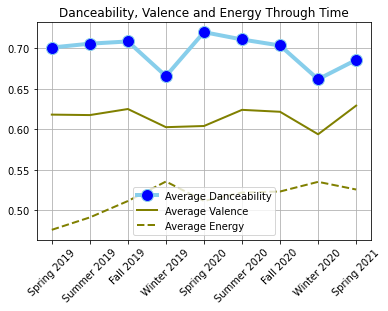

In [73]:
# Plot indicators over time
plt.plot('Date', 'Average Danceability', data=global_df, marker='o', markerfacecolor='blue', 
         markersize=12, color='skyblue', linewidth=4,label='Average Danceability')
plt.plot('Date', 'Average Valence', data=global_df, marker='', 
         color='olive', linewidth=2,label='Average Valence')
plt.plot('Date', 'Average Energy', data=global_df, marker='', color='olive', linewidth=2, 
         linestyle='dashed', label='Average Energy')
plt.grid()
plt.title('Danceability, Valence and Energy Through Time')
plt.xticks(rotation = 45)
plt.legend(loc='best')
plt.show()